In [2]:
#convert the dataset folder into pandas dataframe
import pandas as pd
# from src.data_clean import build_dataframe
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
# from tqdm import tqdm

In [3]:
import pandas as pd
import os
from tqdm import tqdm

def build_dataframe(signal="BVP"):
    """
    Build a dataframe from the dataset folder
    :param signal: the signal to extract
    :return: a dataframe containing the signal

    Possible signals:
    - BVP: Blood Volume Pulse
    - EDA: Electrodermal Activity
    - TEMP: Temperature
    - HR: Heart Rate
    - response: response to the questionnaire
    """
    df = pd.DataFrame()
    for dirname, _, filenames in os.walk('dataset'):
        for filename in filenames:
            try:
                _, group, ID, round, phase = dirname.split("/")
            except ValueError:
                _, group, ID, ID2, round, phase = dirname.split("/")
            # create dataframe from csv file
            if filename.startswith(signal):
                tmp_df = pd.read_csv(os.path.join(dirname, filename))
                tmp_df["group"] = group
                if group == "D1_3":
                    tmp_df["sub_group"] = ID
                    tmp_df["ID"] = int(ID2[-1])
                else:
                    tmp_df["ID"] = int(ID[-1])
                tmp_df["round"] = int(round[-1])
                tmp_df["phase"] = int(phase[-1])
                tmp_df["time_point"] = range(len(tmp_df))
                df = pd.concat([df, tmp_df], axis=0)
        
    if signal == "response":
        df.sort_values(by=['group', 'sub_group', 'ID', 'round', 'phase'], inplace=True)
    else:
        df.sort_values(by=['group', 'sub_group', 'ID', 'round', 'phase', 'time'], inplace=True)
    df.drop(columns=['Unnamed: 0'], inplace=True)
    return df

## Testing plotting of the temperature

In [4]:
df_temp = build_dataframe("TEMP")
df_BVP = build_dataframe("BVP")


In [5]:

df_EDA = build_dataframe("EDA")
df_HR = build_dataframe("HR")


In [6]:

df_response = build_dataframe("response")

In [19]:
#create a combined dataframe containing the temperature, EDA and HR data and combine on group, ID, round, phase and remove time_point
df_combined = pd.merge(df_temp, df_EDA, on=['group', 'ID', 'round', 'phase', 'time_point'])
df_combined = pd.merge(df_combined, df_HR, on=['group', 'ID', 'round', 'phase', 'time_point'])
df_combined.head()

,TEMP,time_x,group,ID,round,phase,time_point,sub_group_x,EDA,time_y,sub_group_y,HR,time,sub_group
0,30.97,2021-12-17 16:11:55.000,D1_1,1,1,1,0,NaN,0.185827,2021-12-17 16:11:55.000,NaN,76.75,2021-12-17 16:11:55,NaN
1,30.97,2021-12-17 16:11:55.250,D1_1,1,1,1,1,NaN,0.203768,2021-12-17 16:11:55.250,NaN,76.75,2021-12-17 16:11:56,NaN
2,30.97,2021-12-17 16:11:55.500,D1_1,1,1,1,2,NaN,0.192234,2021-12-17 16:11:55.500,NaN,76.73,2021-12-17 16:11:57,NaN
3,30.97,2021-12-17 16:11:55.750,D1_1,1,1,1,3,NaN,0.189671,2021-12-17 16:11:55.750,NaN,76.72,2021-12-17 16:11:58,NaN
4,31.01,2021-12-17 16:11:56.000,D1_1,1,1,1,4,NaN,0.185827,2021-12-17 16:11:56.000,NaN,76.72,2021-12-17 16:11:59,NaN


In [20]:
df_combined = pd.merge(df_combined, df_BVP, on=['group', 'ID', 'round', 'phase', 'time_point'])


/tmp/ipykernel_1633/1212353188.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'time_x', 'sub_group_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_combined = pd.merge(df_combined, df_BVP, on=['group', 'ID', 'round', 'phase', 'time_point'])


In [21]:
df_combined.columns

Index(['TEMP', 'time_x', 'group', 'ID', 'round', 'phase', 'time_point',
       'sub_group_x', 'EDA', 'time_y', 'sub_group_y', 'HR', 'time_x',
       'sub_group_x', 'BVP', 'time_y', 'sub_group_y'],
      dtype='object')

In [22]:


df_combined.drop(columns=['time_x', 'group', 'ID', 'round', 
       'sub_group_x',  'time_y', 'sub_group_y',  'time_x',
       'sub_group_x',  'time_y', 'sub_group_y'], inplace=True)
#get dummies
#df_combined = pd.get_dummies(df_combined, columns=['group', 'phase'])
#remove duplicates
#df_combined.drop_duplicates(inplace=True)
df_combined.head()

,TEMP,phase,time_point,EDA,HR,BVP
0,30.97,1,0,0.185827,76.75,-61.33
1,30.97,1,1,0.203768,76.75,-56.25
2,30.97,1,2,0.192234,76.73,-47.83
3,30.97,1,3,0.189671,76.72,-35.69
4,31.01,1,4,0.185827,76.72,-20.53


In [23]:
df_EDA_org = df_EDA.copy()
df_BVP_org = df_BVP.copy()


In [24]:

df_HR_org = df_HR.copy()
df_temp_org = df_temp.copy()


In [25]:

df_response_org = df_response.copy()

In [26]:
# remove the columns: 'particpant_ID','puzzler','team_ID','E4_nr'

df_response = df_response.drop(columns=['particpant_ID','puzzler','team_ID','E4_nr','parent','participant_ID'])

KeyError: "['particpant_ID', 'puzzler', 'team_ID', 'E4_nr', 'parent', 'participant_ID'] not found in axis"

# descriptive stats

In [65]:
# descriptive data analysis

# check the data types
df_combined.dtypes
df_response.dtypes

upset         float64
hostile       float64
alert         float64
ashamed       float64
inspired      float64
nervous       float64
determined    float64
attentive     float64
afraid        float64
active        float64
frustrated    float64
group          object
ID              int64
round           int64
phase           int64
time_point      int64
difficulty    float64
sub_group      object
dtype: object

In [66]:
# check the missing values
df_combined.isnull().sum()

TEMP          0
phase         0
time_point    0
EDA           0
HR            0
BVP           0
dtype: int64

# Making joyplots of data distributions

In [ ]:
import joypy
from matplotlib import cm

%matplotlib inline

In [30]:
print(df_combined[df_combined.phase == 2].HR.min())
print(df_combined[df_combined.phase == 2].HR.max())
print(df_combined[df_combined.phase == 2].BVP.min())
print(df_combined[df_combined.phase == 2].BVP.max())
print(df_combined[df_combined.phase == 2].EDA.min())
print(df_combined[df_combined.phase == 2].EDA.max())
print(df_combined[df_combined.phase == 2].TEMP.min())
print(df_combined[df_combined.phase == 2].TEMP.max())

54.47
137.67
-1377.66
1548.58
0.0
30.817474
29.45
35.59


In [38]:
# make a column for df_combined HR_phase1, HR_phase2, HR_phase3

df_combined_phases = df_combined.copy()
df_combined_phases['HR_phase1'] = df_combined_phases[df_combined_phases.phase == 1].HR
df_combined_phases['HR_phase2'] = df_combined_phases[df_combined_phases.phase == 2].HR
df_combined_phases['HR_phase3'] = df_combined_phases[df_combined_phases.phase == 3].HR

# make a column for df_combined BVP_phase1, BVP_phase2, BVP_phase3
df_combined_phases['BVP_phase1'] = df_combined_phases[df_combined_phases.phase == 1].BVP
df_combined_phases['BVP_phase2'] = df_combined_phases[df_combined_phases.phase == 2].BVP 
df_combined_phases['BVP_phase3'] = df_combined_phases[df_combined_phases.phase == 3].BVP

df_combined_phases['EDA_phase1'] = df_combined_phases[df_combined_phases.phase == 1].EDA
df_combined_phases['EDA_phase2'] = df_combined_phases[df_combined_phases.phase == 2].EDA
df_combined_phases['EDA_phase3'] = df_combined_phases[df_combined_phases.phase == 3].EDA

df_combined_phases['TEMP_phase1'] = df_combined_phases[df_combined_phases.phase == 1].TEMP
df_combined_phases['TEMP_phase2'] = df_combined_phases[df_combined_phases.phase == 2].TEMP
df_combined_phases['TEMP_phase3'] = df_combined_phases[df_combined_phases.phase == 3].TEMP


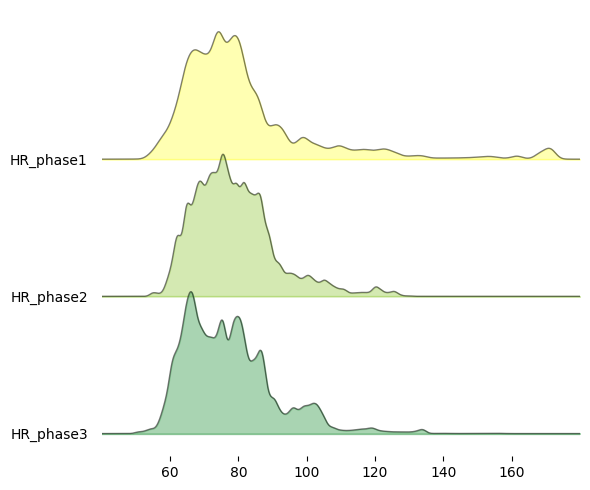

In [45]:
fig, axes = joypy.joyplot(df_combined_phases, column=['HR_phase1', 'HR_phase2', 'HR_phase3'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.summer_r, alpha = 0.5, x_range=[40, 180], overlap=0.5)

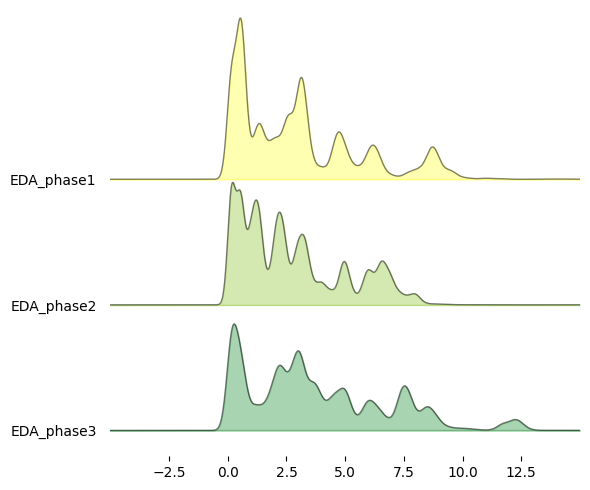

In [46]:
fig, axes = joypy.joyplot(df_combined_phases, column=['EDA_phase1', 'EDA_phase2', 'EDA_phase3'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.summer_r, alpha = 0.5, x_range=[-5, 15])

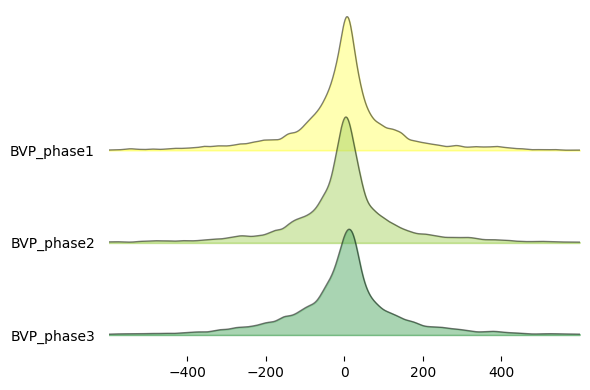

In [43]:
fig, axes = joypy.joyplot(df_combined_phases, column=['BVP_phase1', 'BVP_phase2', 'BVP_phase3'],linewidth=1, legend=True, 
                          figsize=(6,4), colormap=cm.summer_r, alpha = 0.5, x_range = [-600,600])

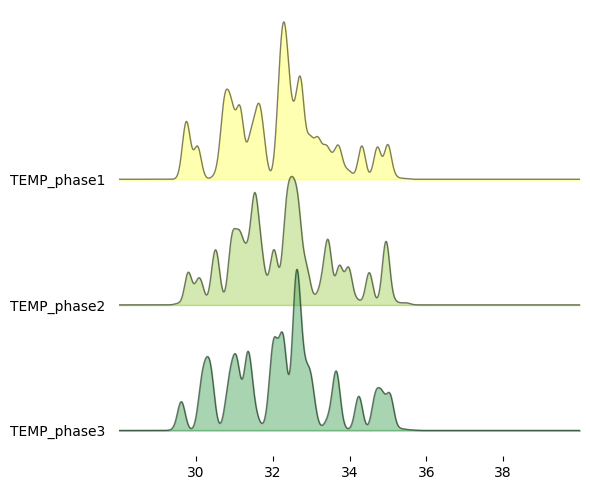

In [48]:
fig, axes = joypy.joyplot(df_combined_phases, column=['TEMP_phase1', 'TEMP_phase2', 'TEMP_phase3'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.summer_r, alpha = 0.5, x_range=[28, 40])

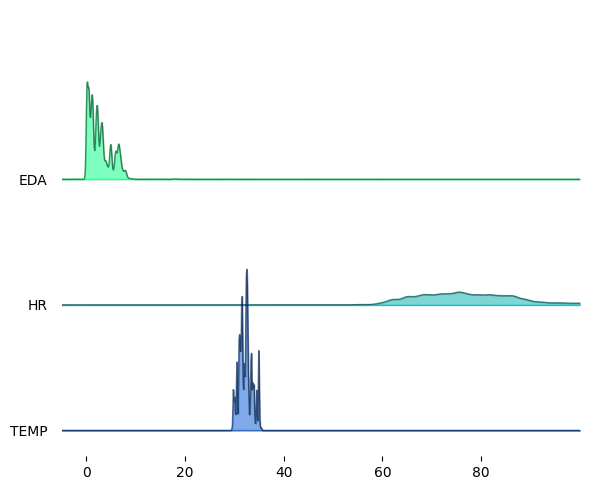

In [34]:


fig, axes = joypy.joyplot(df_combined, column=['EDA', 'HR', 'TEMP'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5, x_range=[-5, 100])
# fig, axes = joypy.joyplot(df_HR[df_HR.phase == 2], column='HR',linewidth=1, legend=True, 
#                           figsize=(6,5), colormap=cm.summer_r, alpha = 0.5)
plt.show()

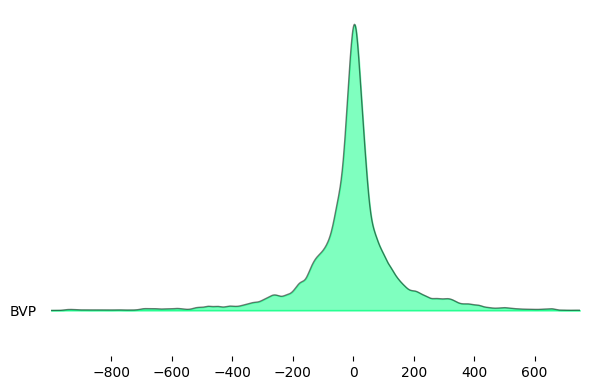

In [33]:
fig, axes = joypy.joyplot(df_combined, column='BVP',linewidth=1, legend=True, 
                          figsize=(6,4), colormap=cm.winter_r, alpha = 0.5, x_range=[-1000, 750])

In [53]:
df_res_phases

,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,frustrated,group,ID,round,phase,time_point,difficulty,sub_group
0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,1.0,D1_1,1,1,1,0,NaN,NaN
0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,3.0,2.0,D1_1,1,1,2,0,5.0,NaN
0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,D1_1,1,1,3,0,NaN,NaN
0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,D1_1,1,2,1,0,NaN,NaN
0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,3.0,1.0,D1_1,1,2,2,0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,D1_3,2,3,2,0,1.0,D1_3_4
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,D1_3,2,3,3,0,0.0,D1_3_4
0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,D1_3,2,4,1,0,0.0,D1_3_4
0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,D1_3,2,4,2,0,2.0,D1_3_4


In [55]:
# alert, inspired, determined, active , frustrated
df_res_phases = pd.DataFrame()

df_res_phases['upset_phase1'] = df_response[df_response.phase == 1].upset
df_res_phases['upset_phase2'] = df_response[df_response.phase == 2].upset
df_res_phases['upset_phase3'] = df_response[df_response.phase == 3].upset


In [56]:

df_res_phases['determined_phase1'] = df_response[df_response.phase == 1].determined
df_res_phases['determined_phase2'] = df_response[df_response.phase == 2].determined   
df_res_phases['determined_phase3'] = df_response[df_response.phase == 3].determined

df_res_phases['alert_phase1'] = df_response[df_response.phase == 1].alert
df_res_phases['alert_phase2'] = df_response[df_response.phase == 2].alert
df_res_phases['alert_phase3'] = df_response[df_response.phase == 3].alert

df_res_phases['inspired_phase1'] = df_response[df_response.phase == 1].inspired
df_res_phases['inspired_phase2'] = df_response[df_response.phase == 2].inspired
df_res_phases['inspired_phase3'] = df_response[df_response.phase == 3].inspired

df_res_phases['frustrated_phase1'] = df_response[df_response.phase == 1].frustrated
df_res_phases['frustrated_phase2'] = df_response[df_response.phase == 2].frustrated
df_res_phases['frustrated_phase3'] = df_response[df_response.phase == 3].frustrated

df_res_phases['active_phase1'] = df_response[df_response.phase == 1].active
df_res_phases['active_phase2'] = df_response[df_response.phase == 2].active
df_res_phases['active_phase3'] = df_response[df_response.phase == 3].active



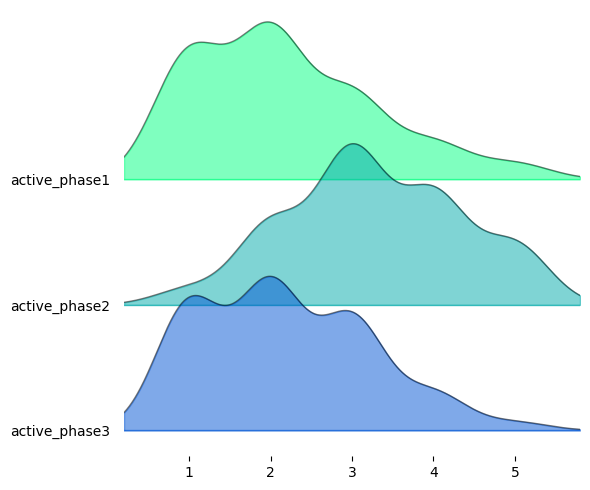

In [57]:
fig, axes = joypy.joyplot(df_res_phases, column=['active_phase1', 'active_phase2', 'active_phase3'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5)

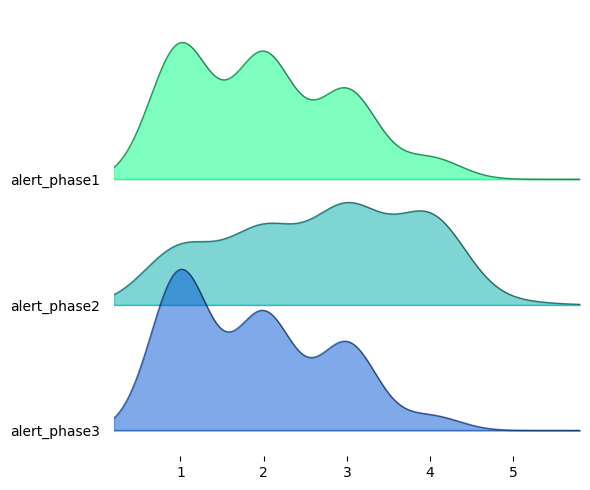

In [58]:
fig, axes = joypy.joyplot(df_res_phases, column=['alert_phase1', 'alert_phase2', 'alert_phase3'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5)

In [59]:
df_res_phases.columns

Index(['upset_phase1', 'upset_phase2', 'upset_phase3', 'determined_phase1',
       'determined_phase2', 'determined_phase3', 'alert_phase1',
       'alert_phase2', 'alert_phase3', 'inspired_phase1', 'inspired_phase2',
       'inspired_phase3', 'frustrated_phase1', 'frustrated_phase2',
       'frustrated_phase3', 'active_phase1', 'active_phase2', 'active_phase3'],
      dtype='object')

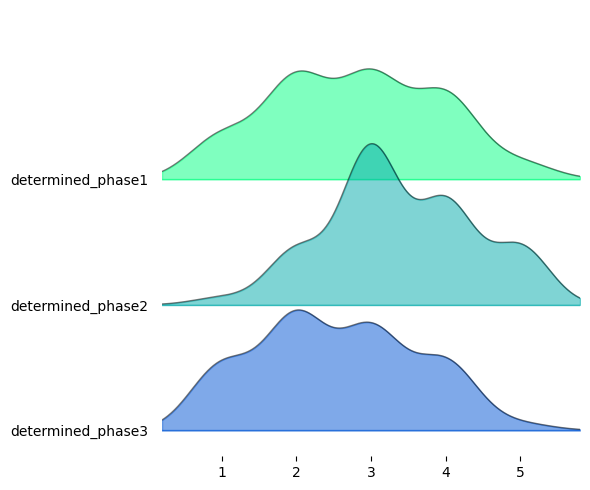

In [61]:
fig, axes = joypy.joyplot(df_res_phases, column=['determined_phase1', 'determined_phase2', 'determined_phase3'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5)

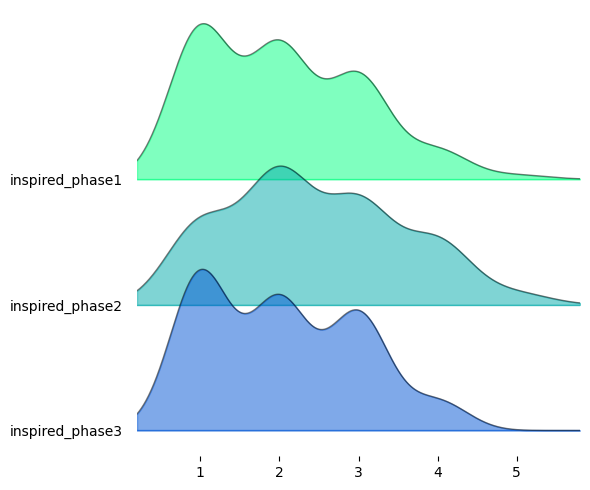

In [62]:
fig, axes = joypy.joyplot(df_res_phases, column=['inspired_phase1', 'inspired_phase2', 'inspired_phase3'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5)

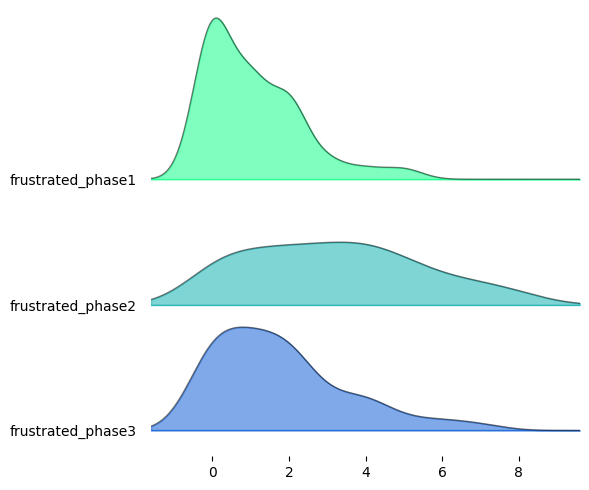

In [63]:
fig, axes = joypy.joyplot(df_res_phases, column=['frustrated_phase1', 'frustrated_phase2', 'frustrated_phase3'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5)

In [89]:
mean_std_emo = df_combined.groupby('phase', as_index=False).agg({'mean','std'})
mean_std_emo

TEMP            time_point                  EDA            \
            mean       std        mean        std      mean       std   
phase                                                                   
1      32.137126  1.317156  146.646335  86.346839  3.014052  2.750493   
2      32.258299  1.327761  156.843221  90.999925  2.787897  2.427206   
3      32.230706  1.386434  150.356094  87.567476  3.864745  3.212214   

              HR                  BVP              
            mean        std      mean         std  
phase                                              
1      81.518799  20.491449 -3.431605  146.605023  
2      78.905711  12.238978 -3.556162  165.454584  
3      77.357212  13.457262 -3.153675  194.265429

In [ ]:
# the mean of the emotions through the phases

mean_emo = df_response.groupby('phase').mean()
mean_std_emodf.groupby(['team'], as_index=False).agg({'points':['mean','std']})

#plot the mean of the emotions through the phases

sns.lineplot(data=mean_emo[['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'determined', 'attentive', 'afraid', 'active', 'frustrated']] ).set(title='Mean of emotions through the phases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


# mean_emo[['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
#        'determined', 'attentive', 'afraid', 'active', 'frustrated']]

,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,frustrated
phase,,,,,,,,,,,
1,1.105769,1.028846,1.990385,1.096154,2.049020,1.451923,2.796117,2.611650,1.077670,2.184466,1.076923
2,1.663462,1.115385,2.701923,1.403846,2.461538,1.451923,3.394231,3.355769,1.057692,3.278846,3.201923
3,1.269231,1.028846,1.884615,1.163462,2.038462,1.240385,2.543689,2.384615,1.019231,2.192308,1.788462


In [ ]:
# standardise the df_combined




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


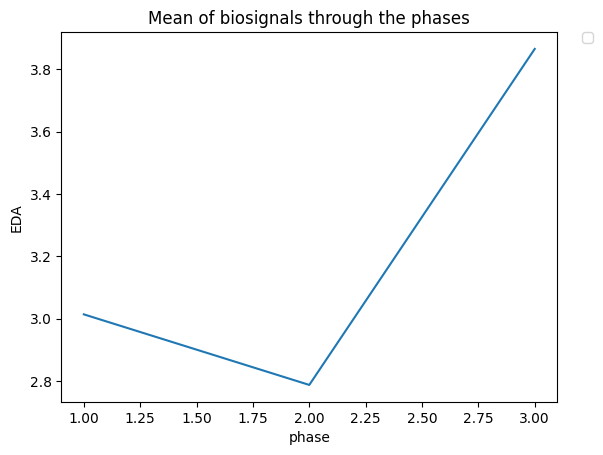

In [71]:
# the mean of the emotions through the phases

mean_bio = df_combined.groupby('phase').mean()
# mean_std_emodf.groupby(['team'], as_index=False).agg({'points':['mean','std']})

#plot the mean of the emotions through the phases


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


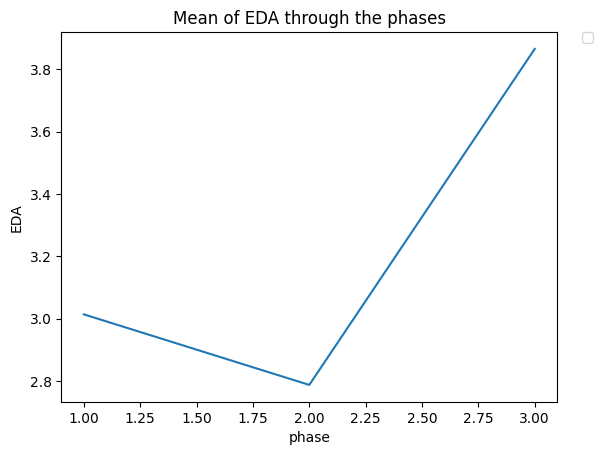

In [83]:

sns.lineplot(data=mean_bio['EDA']).set(title='Mean of EDA through the phases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


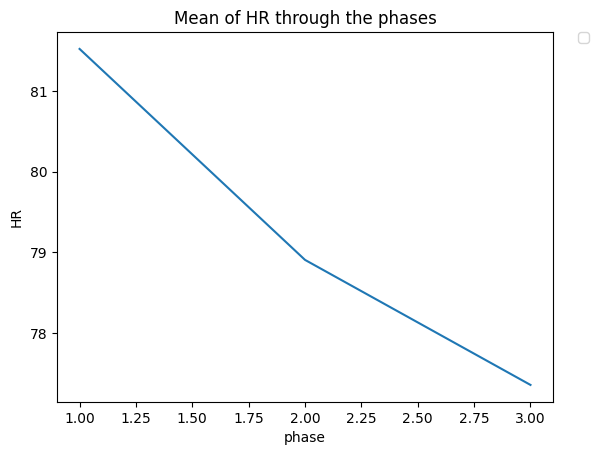

In [79]:
sns.lineplot(data=mean_bio['HR']).set(title='Mean of HR through the phases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


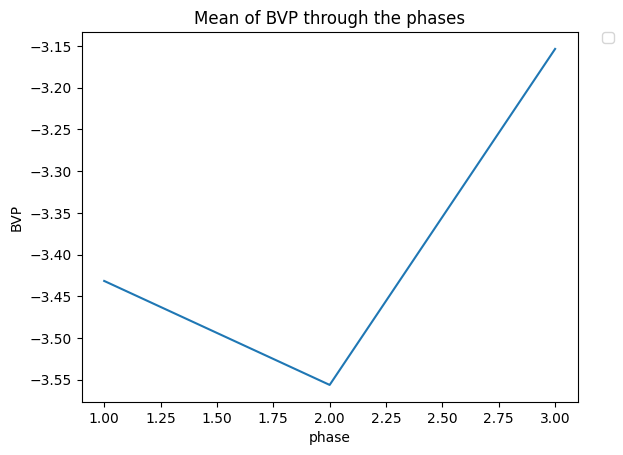

In [80]:
sns.lineplot(data=mean_bio['BVP']).set(title='Mean of BVP through the phases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


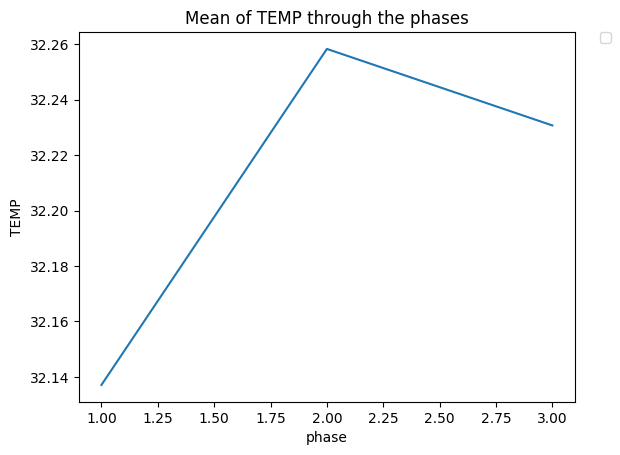

In [82]:
sns.lineplot(data=mean_bio['TEMP']).set(title='Mean of TEMP through the phases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

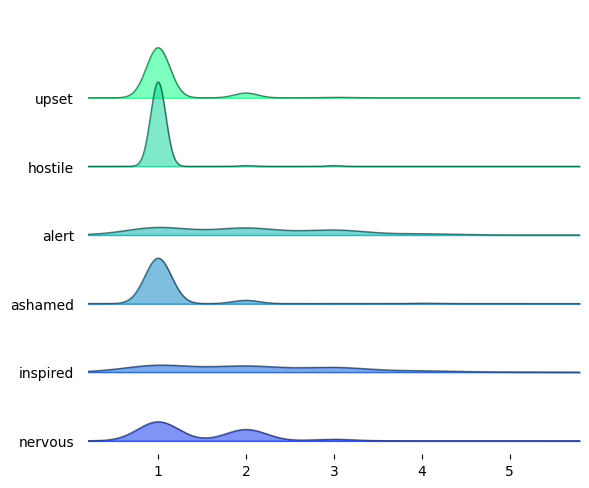

In [ ]:

fig, axes = joypy.joyplot(df_response[df_response.phase == 1],  column=['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5, overlap=0.5)

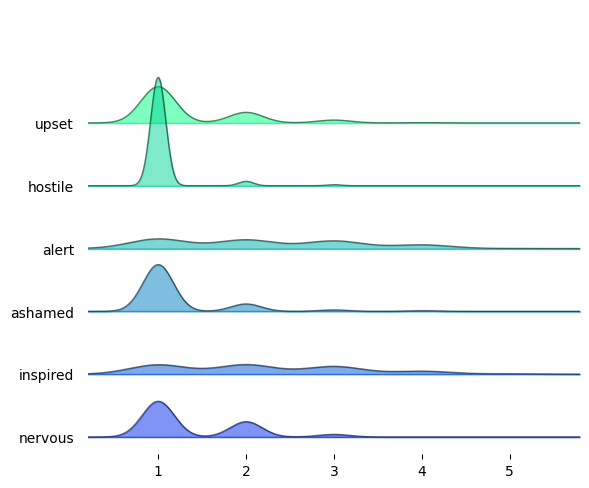

In [ ]:
fig, axes = joypy.joyplot(df_response,  column=['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous'],linewidth=1, legend=True, 
                          figsize=(6,5), colormap=cm.winter_r, alpha = 0.5)

In [13]:
# merge together the df_response and df_HR on the 'phase' and 'sub_group' columns
df_res_EDA = pd.merge(df_response, df_EDA, on=['phase', 'sub_group','ID'])
df_res_EDA = df_res_EDA.iloc[::500, :]


In [14]:
df_res_EDA

,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,...,round_x,phase,time_point_x,difficulty,sub_group,EDA,time,group_y,round_y,time_point_y
0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.185827,2021-12-17 16:11:55.000,D1_1,1,0
500,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.228118,2021-12-17 16:14:00.000,D1_1,1,500
1000,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.265283,2021-12-17 16:16:05.000,D1_1,1,1000
1500,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.283225,2021-12-17 16:18:10.000,D1_1,1,1500
2000,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,2.0,...,1,1,0,NaN,NaN,0.501091,2021-12-17 16:43:17.750,D1_1,2,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4,3,0,0.0,D1_3_4,4.478825,2022-10-28 16:36:47.500,D1_3,3,276
2279500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4,3,0,0.0,D1_3_4,4.836230,2022-10-28 16:38:52.500,D1_3,3,776
2280000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4,3,0,0.0,D1_3_4,6.521056,2022-10-28 16:55:41.250,D1_3,4,47
2280500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4,3,0,0.0,D1_3_4,5.656044,2022-10-28 16:57:46.250,D1_3,4,547


In [15]:

df_merged = pd.merge(df_response, df_HR, on=['phase', 'sub_group','ID'])
df_merged = df_merged.iloc[::500, :]



In [16]:

df_res_EDA_HR = pd.merge(df_res_EDA, df_merged, on=['phase', 'sub_group','ID'])
df_res_EDA_HR_500 = df_res_EDA_HR.iloc[::500, :]
# use iloc to take every 1000th row


# ax = sns.catplot(x='marital_status',kind='count',data=census_data,orient="h")
# ax.fig.autofmt_xdate()

In [17]:
df_res_EDA_HR_500.describe()

,upset_x,hostile_x,alert_x,ashamed_x,inspired_x,nervous_x,determined_x,attentive_x,afraid_x,active_x,...,attentive_y,afraid_y,active_y,frustrated_y,round_x_y,time_point_x_y,difficulty_y,HR,round_y_y,time_point_y_y
count,270.000000,270.000000,270.000000,270.000000,266.000000,270.000000,267.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,270.000000,270.000000,270.0,106.000000,270.000000,270.000000,270.000000
mean,1.451852,1.088889,2.051852,1.292593,2.075188,1.311111,2.775281,2.687732,1.055762,2.397770,...,2.613383,1.033457,2.353160,2.274074,2.681481,0.0,5.160377,76.678185,2.359259,171.259259
std,0.697510,0.333209,0.966491,0.639136,0.912174,0.538022,1.034221,1.119317,0.312450,1.146765,...,1.129311,0.180162,1.220854,2.001596,1.028601,0.0,2.453906,10.228563,1.070302,94.849202
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,53.320000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,0.0,4.000000,71.300000,1.000000,89.250000
50%,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,2.000000,...,3.000000,1.000000,2.000000,2.000000,3.000000,0.0,6.000000,75.880000,2.000000,172.000000
75%,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,1.000000,3.000000,...,3.000000,1.000000,3.000000,4.000000,4.000000,0.0,6.750000,82.242500,3.000000,250.000000
max,4.000000,3.000000,4.000000,4.000000,5.000000,3.000000,5.000000,5.000000,4.000000,5.000000,...,5.000000,2.000000,5.000000,8.000000,4.000000,0.0,9.000000,126.980000,4.000000,434.000000


/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seabor

<Axes: >

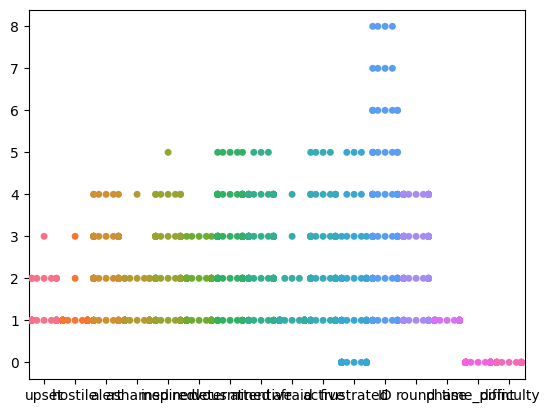

In [22]:
sns.swarmplot(data = df_response[df_response['phase'] == 1])

/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 89.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seabor

<Axes: >

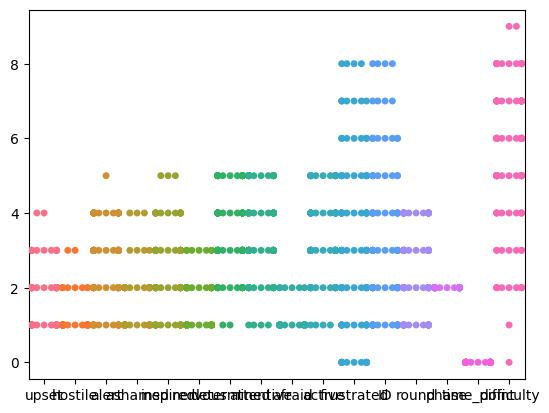

In [23]:
sns.swarmplot(data = df_response[df_response['phase'] == 2])

<Axes: xlabel='phase'>

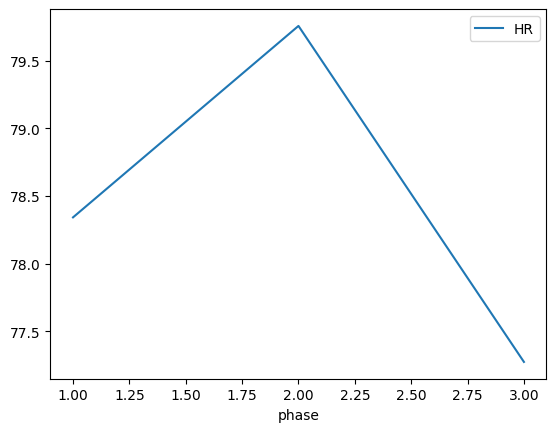

In [42]:
mean_HR = df_HR.groupby('phase').mean()
sns.lineplot(data=mean_HR[['HR']] )

/tmp/ipykernel_7487/2928587334.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_EDA = df_EDA.groupby('phase').mean()


<Axes: xlabel='phase'>

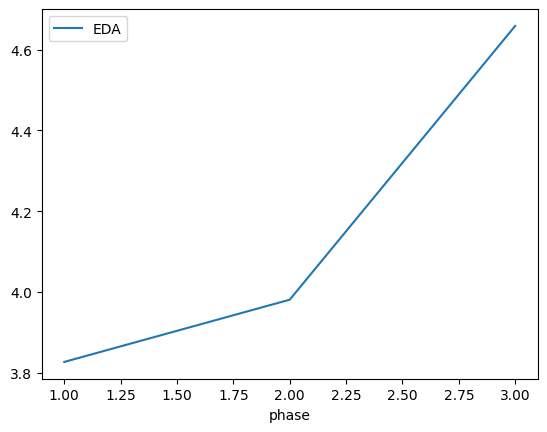

In [43]:
mean_EDA = df_EDA.groupby('phase').mean()
sns.lineplot(data=mean_EDA[['EDA']] )

In [49]:
mean_BVP = df_BVP.groupby(['phase','ID']).mean()
mean_BVP
# sns.lineplot(data=mean_BVP[['BVP']] , hue='ID')

/tmp/ipykernel_7487/1711514650.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_BVP = df_BVP.groupby(['phase','ID']).mean()


BVP     round    time_point
phase ID                                  
1     1  -0.002543  2.467067   9810.927088
      2  -0.004279  2.512823   9468.738036
      3  -0.003228  2.438752   9946.245458
      4   0.154033  2.475753   9482.972659
      5  -0.030249  2.434150  10608.229058
      6  -0.007906  2.412488  10482.932402
      7   0.081072  2.377922  11432.551993
      8  -0.053003  2.340297  11165.792167
2     1  -0.056968  2.470364  10304.386503
      2  -0.004718  2.493919  10080.141714
      3  -0.025724  2.476625  10355.997610
      4   0.019361  2.459487  10350.337301
      5   0.034454  2.429292  10566.586030
      6  -0.032103  2.483426  10085.383569
      7  -0.057829  2.464770  10365.919228
      8  -0.010676  2.431888  11389.925719
3     1  -0.002706  2.476612   9819.865935
      2  -0.010164  2.477502   9820.454374
      3  -0.023401  2.463911   9791.859461
      4  -0.015811  2.466877   9748.296325
      5  -0.009711  2.486620   9936.937397
      6   0.035061  2.503845   9798.354941
      7  -0.080686  2.497881   9955.491997
      8   0.071948  2.415318  10495.902469

In [48]:
df_BVP

,BVP,time,group,ID,round,phase,time_point,sub_group
0,-61.33,2021-12-17 16:11:54.953125,D1_1,1,1,1,0,NaN
1,-56.25,2021-12-17 16:11:54.968750,D1_1,1,1,1,1,NaN
2,-47.83,2021-12-17 16:11:54.984375,D1_1,1,1,1,2,NaN
3,-35.69,2021-12-17 16:11:55.000000,D1_1,1,1,1,3,NaN
4,-20.53,2021-12-17 16:11:55.015625,D1_1,1,1,1,4,NaN
...,...,...,...,...,...,...,...,...
19369,87.59,2022-10-28 17:00:31.984375,D1_3,2,4,3,19369,D1_3_4
19370,90.72,2022-10-28 17:00:32.000000,D1_3,2,4,3,19370,D1_3_4
19371,95.53,2022-10-28 17:00:32.015625,D1_3,2,4,3,19371,D1_3_4
19372,101.95,2022-10-28 17:00:32.031250,D1_3,2,4,3,19372,D1_3_4


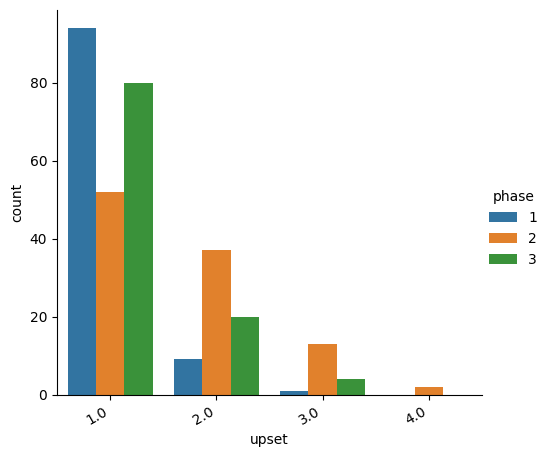

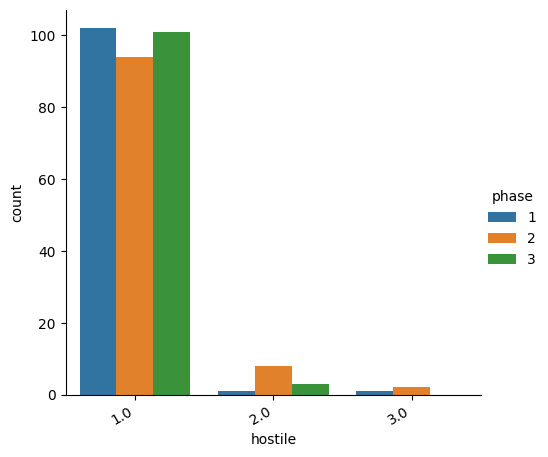

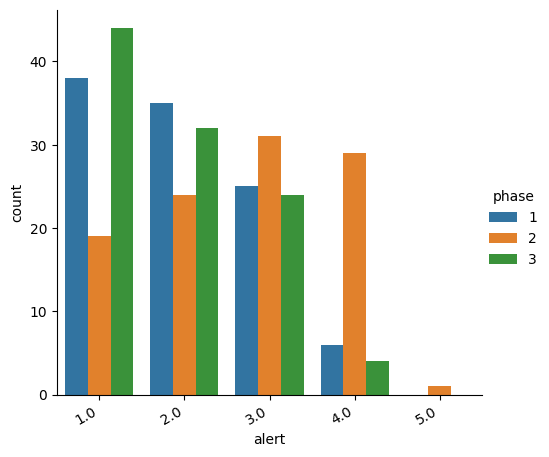

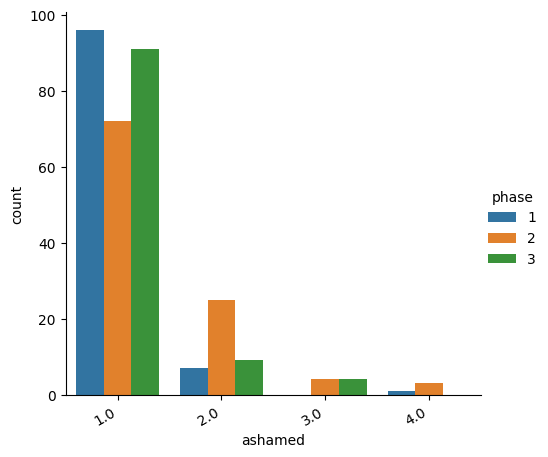

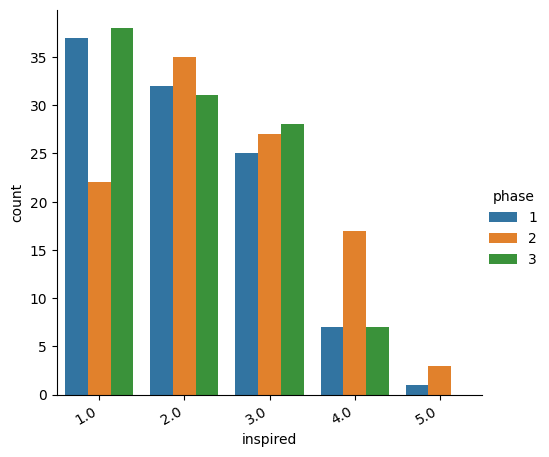

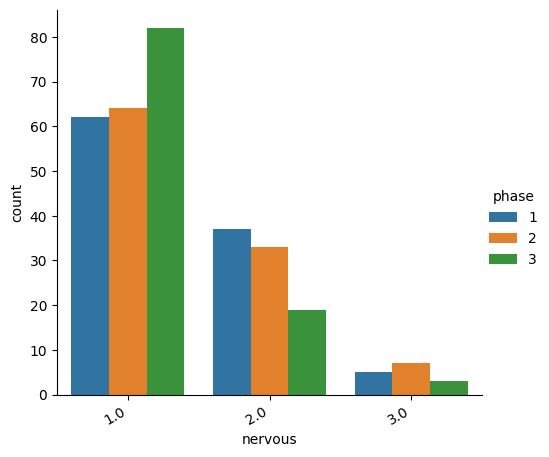

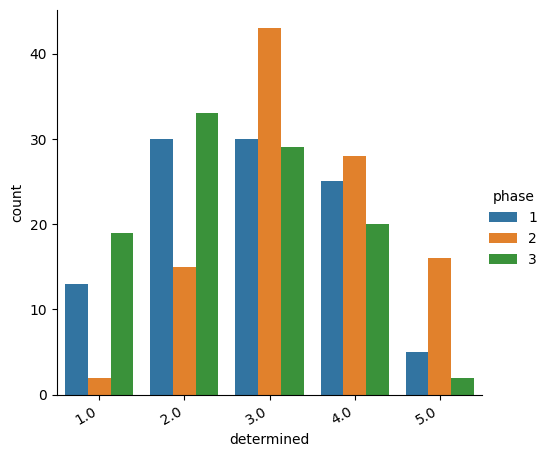

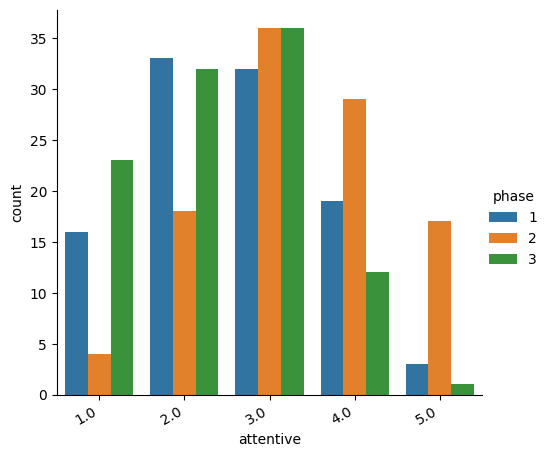

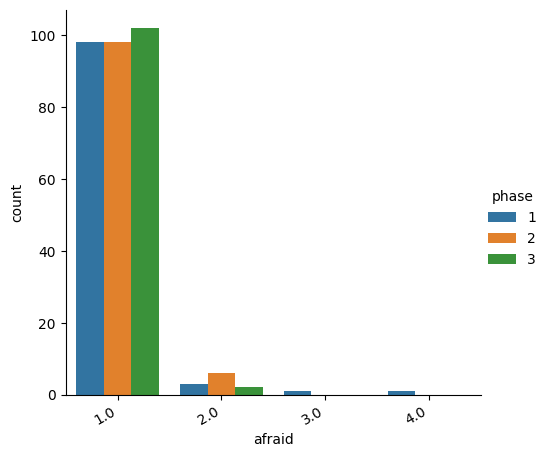

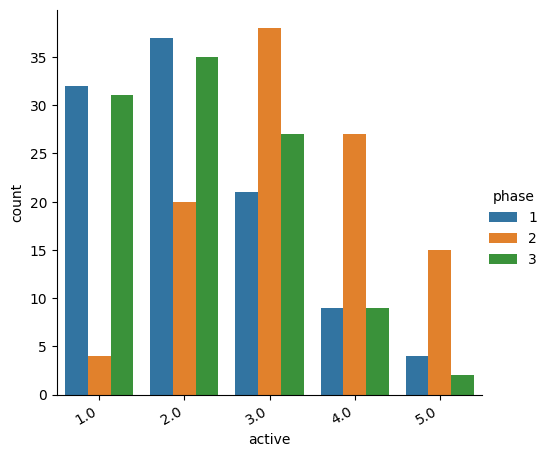

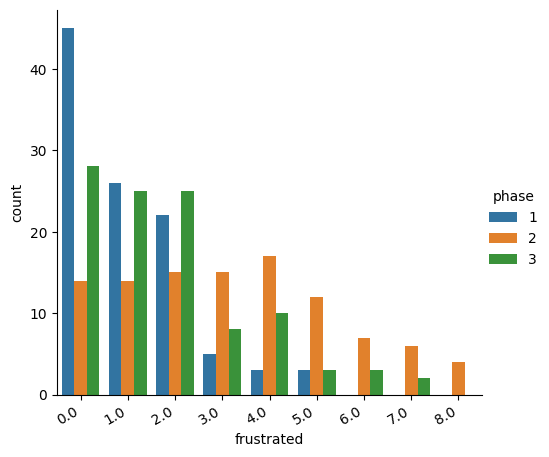

In [32]:
emotions = ['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'determined', 'attentive', 'afraid', 'active', 'frustrated']
for i in emotions:
    ax = sns.catplot(x=i,kind='count',data=df_response,orient="h", hue="phase")
    ax.fig.autofmt_xdate()
     

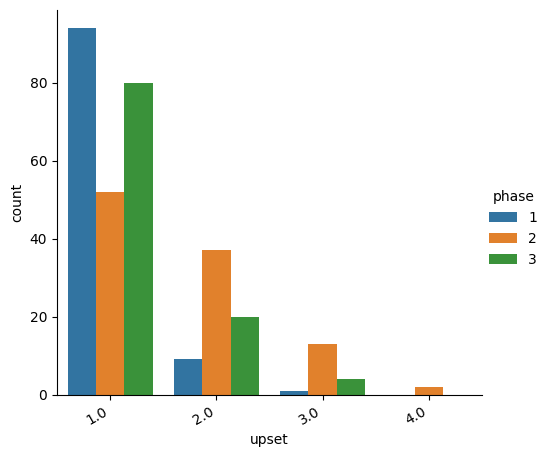

In [27]:
ax = sns.catplot(x='upset',kind='count',data=df_response,orient="h", hue="phase")
ax.fig.autofmt_xdate()

/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='afraid', ylabel='determined'>

/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katrine_bay/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


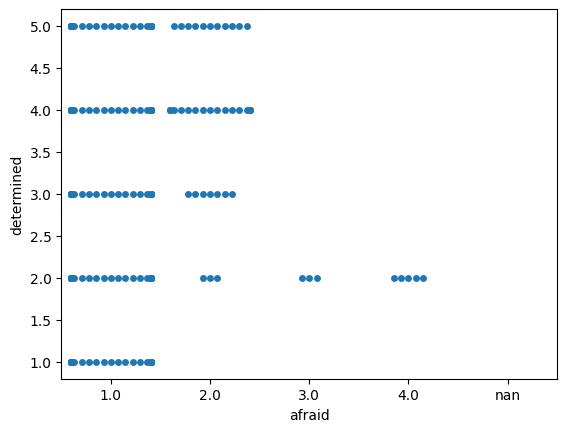

In [18]:
sns.swarmplot(x = "afraid", y = "determined", data = df_res_EDA_HR_500) #(with kind=”swarm”)

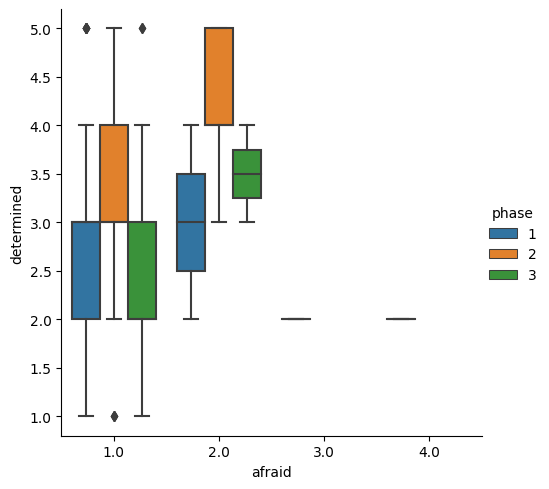

In [16]:
sns.catplot(x = "afraid", y = "determined",kind='box',hue='phase',data=df_merged)


In [1]:
for i in range(1,4):
    heatmap = sns.heatmap(df_res_EDA_HR_500[df_res_EDA_HR_500.phase == i].corr(), vmin=-0.3, vmax=1, annot=False)
    # title 
    title = "Phase " + str(i)
    plt.show()

NameError: name 'sns' is not defined

/tmp/ipykernel_5686/47855629.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_merged[df_merged.phase == i].corr(), vmin=-0.3, vmax=1, annot=False)


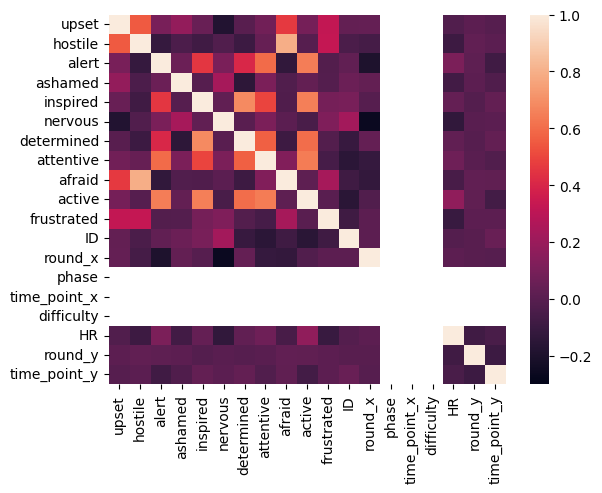

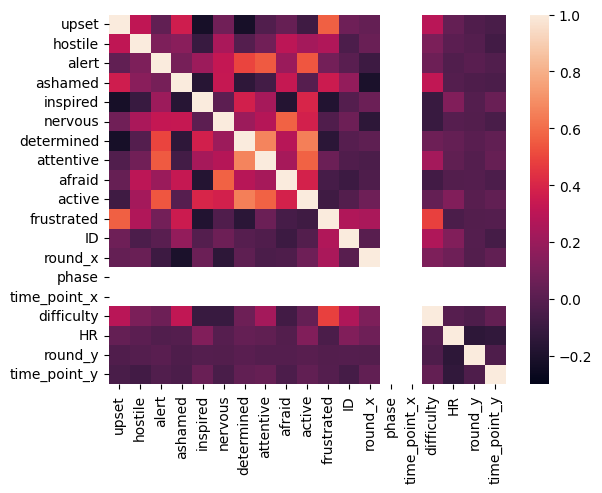

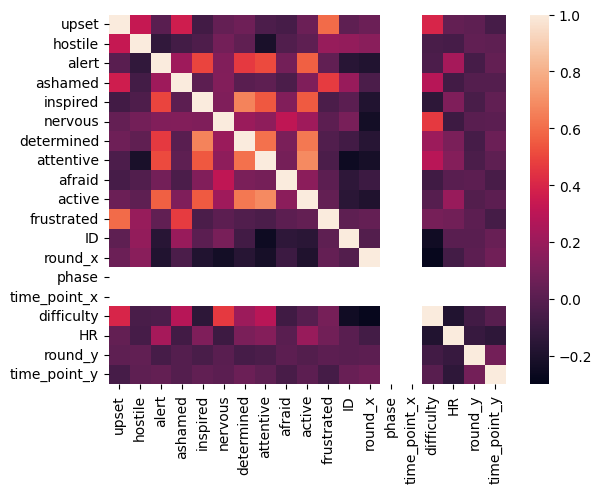

In [34]:
# heatmap of df_merged
for i in range(1,4):
    heatmap = sns.heatmap(df_merged[df_merged.phase == i].corr(), vmin=-0.3, vmax=1, annot=False)
    # title 
    title = "Phase " + str(i)
    plt.show()
# heatmap = sns.heatmap(df_merged[df_merged.phase == 2].corr(), vmin=-0.3, vmax=1, annot=False)



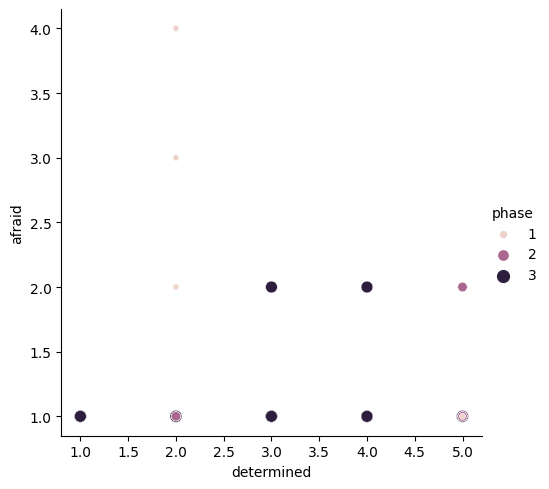

In [17]:
sns.relplot(x="determined", y="afraid", data=df_merged, hue = "phase", size="phase")

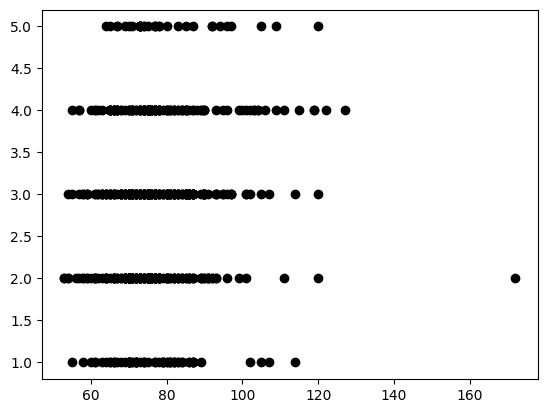

In [18]:
plt.plot(np.round(df_merged['HR']), df_merged['determined'], 'o', color='black')

<Axes: xlabel='phase', ylabel='HR'>

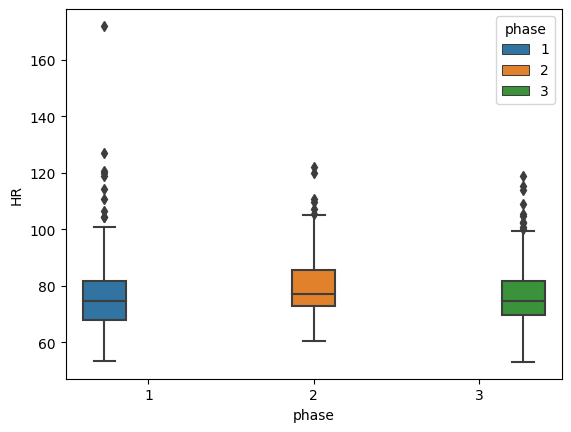

In [19]:
# make a boxplot of the HR for each phase

sns.boxplot(data=df_merged, x='phase', y='HR', hue='phase')

<Axes: xlabel='phase'>

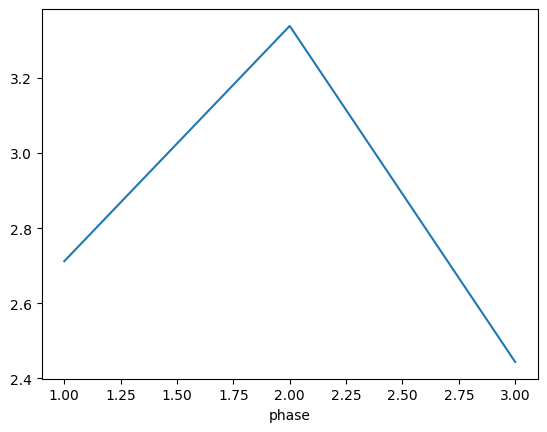

In [20]:
df_merged['determined'].groupby(df_merged['phase']).mean().plot()

<Axes: xlabel='phase'>

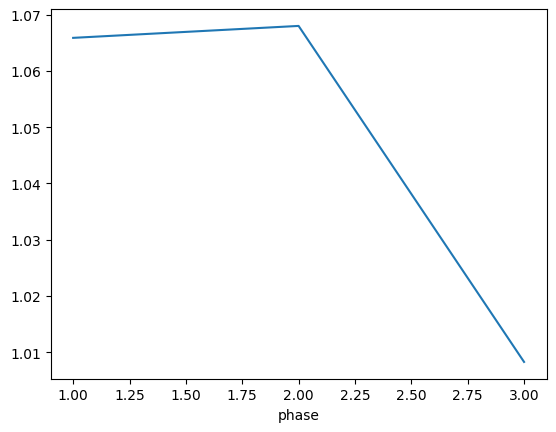

In [13]:
df_merged['afraid'].groupby(df_merged['phase']).mean().plot()

<Axes: xlabel='determined', ylabel='afraid'>

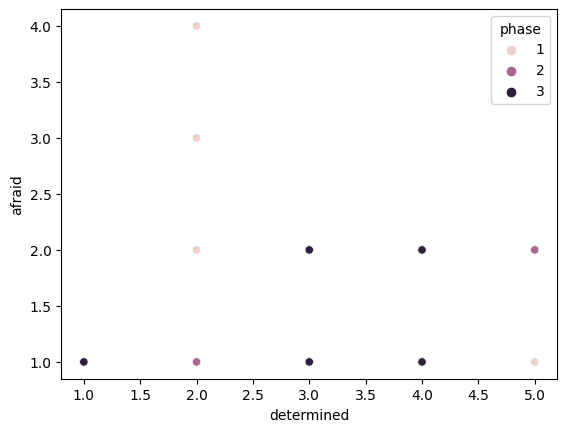

In [14]:
# correlation between the HR and the afraid response

sns.scatterplot(data=df_merged, x='determined', y='afraid', hue='phase')

In [ ]:
# correlation 

In [25]:
# plot the HR and the alert

# sns.scatterplot(data=df_merged, x='HR', y="alert", hue="phase")

<Axes: xlabel='HR', ylabel='alert'>

Error in callback <function _draw_all_if_interactive at 0x7f86a6999630> (for post_execute):


KeyboardInterrupt: 